In [2]:
%matplotlib inline
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')

In [4]:
dpts_shape = gpd.read_file('./depts-shp/departements-20180101.shp')
dpts_pop = pd.read_csv('./pop-departements.csv', sep=';', skiprows=2)

In [5]:
dpts_pop.head()

,Code,Libellé,Estimations de population 2019
0,01,Ain,653688
1,02,Aisne,528016
2,03,Allier,333065
3,04,Alpes-de-Haute-Provence,161980
4,05,Hautes-Alpes,141784


In [6]:
dpts_shape.head()

,code_insee,nom,nuts3,wikipedia,surf_km2,geometry
0,974,La Réunion,FR940,fr:La Réunion,2505.0,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -..."
1,11,Aude,FR811,fr:Aude (département),6343.0,"POLYGON ((1.68872 43.27368, 1.69001 43.27423, ..."
2,43,Haute-Loire,FR723,fr:Haute-Loire,5003.0,"POLYGON ((3.08206 45.28988, 3.08209 45.29031, ..."
3,13,Bouches-du-Rhône,FR823,fr:Bouches-du-Rhône,5247.0,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4..."
4,47,Lot-et-Garonne,FR614,fr:Lot-et-Garonne,5385.0,"POLYGON ((-0.14058 44.22648, -0.12931 44.23218..."


In [7]:
dpts = dpts_shape.merge(dpts_pop.rename(columns={
    'Libellé': 'nom',
    'Estimations de population 2019': 'pop',
}))[['code_insee', 'nom', 'geometry', 'pop', 'surf_km2']]

In [9]:
dpts['area_km2'] = dpts.to_crs({'proj': 'cea'}).geometry.area / 1e6

In [10]:
dpts['density'] = dpts['pop'] / dpts['area_km2']

In [11]:
paris = dpts[dpts.nom == 'Paris'].iloc[0].geometry.centroid
dpts = dpts[dpts.geometry.distance(paris) < 10]

In [12]:
dpts = dpts.to_crs({'init': 'epsg:3395'})  # mercator projection

<Figure size 576x396 with 0 Axes>

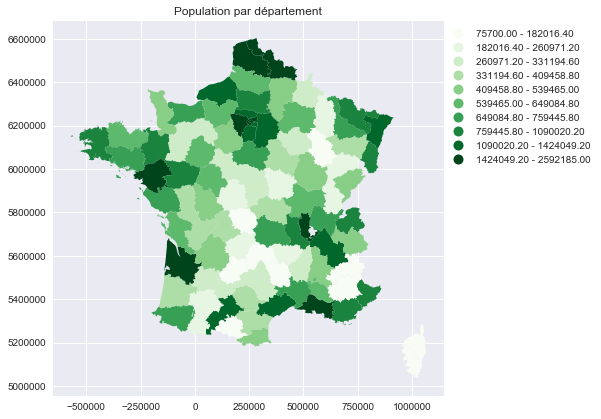

In [13]:
plt.figure()

p = dpts.plot(column='pop',
    figsize=(7, 7),
    legend=True,
    cmap='Greens',
    scheme='quantiles',
    classification_kwds={'k': 10},
)

plt.title('Population par département')
p.legend_.set_bbox_to_anchor((1.4, 1))

<Figure size 576x396 with 0 Axes>

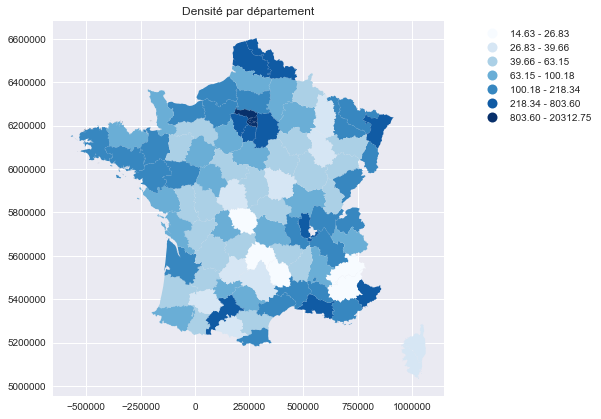

In [14]:
plt.figure()

p = dpts.plot(column='density',
          figsize=(7, 7),
          legend=True,
          cmap='Blues',
          scheme='percentiles',
          classification_kwds={'pct': [5, 15, 40, 60, 85, 95, 100]}
)

plt.title('Densité par département')
p.legend_.set_bbox_to_anchor((1.4, 1))